In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [40]:
torch.manual_seed(42)

In [3]:
train_set = torchvision.datasets.MNIST(
    root="../data/raw/",
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



77.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ../data/raw/MNIST\raw\train-images-idx3-ubyte.gz to ../data/raw/MNIST\raw



102.8%


Extracting ../data/raw/MNIST\raw\train-labels-idx1-ubyte.gz to ../data/raw/MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting ../data/raw/MNIST\raw\t10k-images-idx3-ubyte.gz to ../data/raw/MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



112.7%
c:\users\matija\desktop\main\ai\development\dev\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ../data/raw/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/raw/MNIST\raw

Processing...
Done!


In [16]:
ls "../data/raw/MNIST/processed/"

 Volume in drive C has no label.
 Volume Serial Number is C848-4D31

 Directory of C:\Users\Matija\Desktop\main\ai\development\autoencoder\data\raw\MNIST\processed

06/07/2021  08:22 PM    <DIR>          .
06/07/2021  08:22 PM    <DIR>          ..
06/07/2021  08:22 PM         7,921,087 test.pt
06/07/2021  08:22 PM        47,521,087 training.pt
               2 File(s)     55,442,174 bytes
               2 Dir(s)  20,582,006,784 bytes free


In [25]:
train_len = len(train_set)
train_len

60000

In [26]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=train_len)

In [27]:
images, targets = next(iter(train_loader))

In [28]:
images.shape

torch.Size([60000, 1, 28, 28])

In [29]:
images = torch.flatten(images, start_dim=1)

In [30]:
images.shape

torch.Size([60000, 784])

In [31]:
images_embedded = TSNE().fit_transform(images)
images_embedded.shape

(60000, 2)

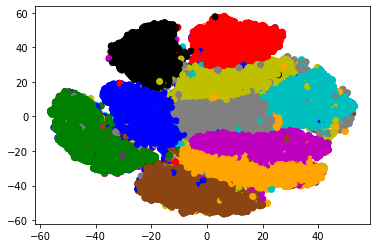

In [38]:
colormap = np.array(["r", "g", "b", "c", "m", "y", "k", "#8B4513", "#808080", "#FFA500"])
plt.scatter(images_embedded[:, 0], images_embedded[:, 1], c=colormap[targets])
plt.show()

In [39]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Using GPU: {use_cuda}")

Using GPU: True


In [346]:
vanilla_ae = nn.Sequential(
    nn.Linear(784, 256),
    nn.LeakyReLU(),
    nn.Linear(256, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 256),
    nn.LeakyReLU(),
    nn.Linear(256, 784)
).to(device)

In [347]:
optimizer = optim.Adam(vanilla_ae.parameters(), lr=.003)
n_epochs = 50
batch_size = 64
new_train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)

In [348]:
def train(model, train_loader, optimizer, n_epochs):
    
    mse = []
    
    for e in range(1, n_epochs + 1):
    
        batch_mse = 0

        for batch in train_loader:
            images, _ = batch

            images = torch.flatten(images, start_dim=1).to(device)
            preds = model(images)
            loss = F.smooth_l1_loss(preds, images, reduction="sum")
            
            batch_mse+=loss.item()
            
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()
        
        print(f"epoch: {e}, mse: {batch_mse/60000}")
        
        mse.append(batch_mse/60000)
    
    return mse

In [349]:
mse = train(vanilla_ae, new_train_loader, optimizer, n_epochs)

epoch: 1, mse: 7.621076332600912
epoch: 2, mse: 4.714933697509766
epoch: 3, mse: 4.29766957728068
epoch: 4, mse: 4.087732389068604
epoch: 5, mse: 3.80785004679362
epoch: 6, mse: 3.755888587697347
epoch: 7, mse: 3.5857538513183593
epoch: 8, mse: 3.7749224581400553
epoch: 9, mse: 3.785419337717692
epoch: 10, mse: 3.5079765375773113
epoch: 11, mse: 3.3265519254048663
epoch: 12, mse: 3.3695386423746743
epoch: 13, mse: 3.271343696339925
epoch: 14, mse: 3.2656503036499025
epoch: 15, mse: 3.1979701764424644
epoch: 16, mse: 3.0658394182840984
epoch: 17, mse: 2.993377722676595
epoch: 18, mse: 3.0750054616292317
epoch: 19, mse: 2.9714663851420084
epoch: 20, mse: 3.076045557657878
epoch: 21, mse: 3.0169986757914224
epoch: 22, mse: 3.1139502731323243
epoch: 23, mse: 2.8921471834818524
epoch: 24, mse: 3.088886741892497
epoch: 25, mse: 3.0435655166625977
epoch: 26, mse: 2.850856916554769
epoch: 27, mse: 2.98528202641805
epoch: 28, mse: 3.022026111094157
epoch: 29, mse: 2.8274156761169436
epoch: 30, 

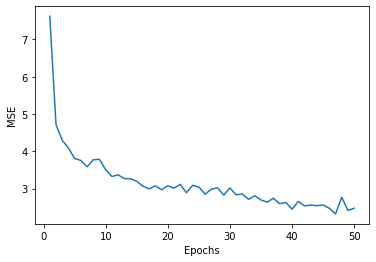

In [350]:
plt.plot(range(1, n_epochs + 1), mse)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [351]:
idx = np.random.randint(0, 59999)

In [352]:
random_image, random_target = train_set[idx]

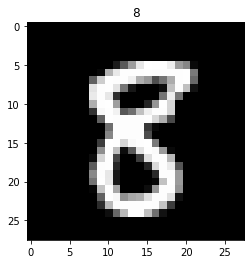

In [353]:
plt.imshow(random_image.squeeze(), cmap="gray")
plt.title(random_target)
plt.show()

In [354]:
random_image = torch.flatten(random_image, start_dim=1).to(device)

In [355]:
random_image.shape

torch.Size([1, 784])

In [356]:
vanilla_ae.eval()
with torch.no_grad():
    prediction = vanilla_ae(random_image)

In [357]:
prediction.shape

torch.Size([1, 784])

In [358]:
recreated_image = torch.reshape(prediction, (1, 28, 28)).detach().cpu()

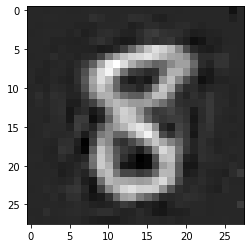

In [360]:
plt.imshow(recreated_image.squeeze(), cmap="gray")
plt.show()

In [361]:
new_ae = nn.Sequential(*list(vanilla_ae.children())[:-3])
new_ae

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=256, out_features=100, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
)

In [362]:
images, _ = next(iter(train_loader))

In [363]:
images = torch.flatten(images, start_dim=1).to(device)

In [364]:
images.shape

torch.Size([60000, 784])

In [365]:
images_in_latent_space = new_ae(images)

In [366]:
images_in_latent_space.shape

torch.Size([60000, 100])

In [367]:
images_new_embedded = TSNE().fit_transform(images_in_latent_space.detach().cpu())
images_new_embedded.shape

(60000, 2)

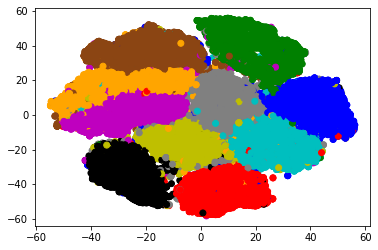

In [368]:
colormap = np.array(["r", "g", "b", "c", "m", "y", "k", "#8B4513", "#808080", "#FFA500"])
plt.scatter(images_new_embedded[:, 0], images_new_embedded[:, 1], c=colormap[targets])
plt.show()

In [369]:
torch.save(vanilla_ae.state_dict(), "../models/vanilla_ae.pt")